In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import cdd
from modulus_tools import demo_graphs
from modulus_tools import algorithms as alg
from itertools import product
import minimum_degree as mg

In [50]:
def vertexpath(G,S,T):
    G.add_node('s')
    G.add_node('t')
    for u in S:
        G.add_edge('s',u)
    for u in T:
        G.add_edge(u,'t')
    path = nx. all_simple_paths(G, 's', 't')
    P = []
    for u in path:
        P.append(u[1:-1])
    m = len(G.nodes())
    rows = []
    for s in P:
        row = (m-2)*[0]
        for i in range(m-2):
            if i in s:
                row[i]=1        
        rows.append(row)
    return rows

In [51]:
def dual(R,m):
    # initialize an empty list of rows for the augmented matrix
    rows = []
    # add rows corresponding to the constraints rho >= 0
    for i in range(1,m+1):
        row = (m+1)*[0]
        row[i] = 1
        rows.append(row)   
    # add rows corresponding to the constraints N*rho >= 1
    for miss in R:
        row = [-1] + miss
        rows.append(row)   
    # create the polyhedron in cdd
    mat = cdd.Matrix(rows, number_type='fraction')
    mat.rep_type = cdd.RepType.INEQUALITY
    poly = cdd.Polyhedron(mat)
    ext = poly.get_generators()
    # list of dual objects
    dual = []
    # loop over extreme points and directions
    for i in range(ext.row_size):
    
        # skip extreme directions
        if ext[i][0] == 0:
            continue
        
        # add the vector representation of the dual object
        dual.append(ext[i][1:])
    return dual

[(0, 0, 1, 0, 0, 0, 1, 1, 0, 1), (0, 0, 1, 0, 0, 0, 0, 1, 1, 1), (0, 1, 1, 0, 0, 0, 0, 0, 1, 0), (0, 1, 1, 0, 0, 0, 1, 0, 0, 0), (1, 1, 1, 0, 0, 0, 0, 0, 0, 0), (1, 0, 1, 0, 0, 0, 0, 1, 0, 1)]


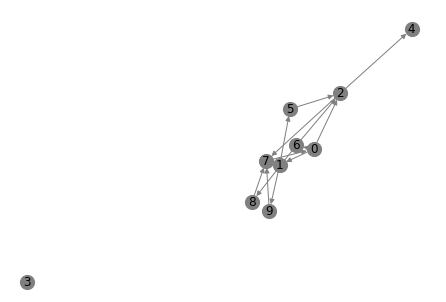

In [52]:
#import random as rnd
seed= 123
G = nx.gnp_random_graph(10, 0.1, seed, directed = True)
m= len(G.nodes())
pos = nx.spring_layout(G)
labels = {u:(u)  for u in G.nodes}
nx.draw(G, pos, node_size=200, node_color='gray', edge_color='gray')
nx.draw_networkx_labels(G, pos,labels=labels, font_size=12)
S= [0,1,2]
T =[2,m-2,m-1,m-3]
R = vertexpath(G,S,T)

print(dual(R,m))